In [3]:
# Map trimmed reads with STAR using parallel
#Cut and paste these unix commands:
for fq in /home/bradmain/gambiae/malphigs/raw/*-*fastq.gz
do
echo "/home/bradmain/gambiae/ASE/bin/STAR/source/STAR --genomeDir /home/bradmain/gambiae/malphigs/raw/STAR/Acolgenome --sjdbGTFfile /home/bradmain/gambiae/malphigs/raw/STAR/Acolgenome/Anopheles-coluzzii-Mali-NIH_BASEFEATURES_AcolM1.3.gtf --readFilesIn $fq --readFilesCommand zcat --outSAMtype BAM Unsorted SortedByCoordinate --outFilterMultimapNmax 1 --outSAMunmapped Within --quantMode TranscriptomeSAM GeneCounts --twopassMode Basic --outFileNamePrefix $(basename $fq _L007_R1_001.fastq.gz) --runThreadN 20"
done


SyntaxError: invalid syntax (<ipython-input-3-e12f36d5217f>, line 2)

In [ ]:
#Make ~htseq output
#Cut and paste these unix commands:
for count in *ReadsPerGene.out.tab
do
grep ACOM $count | awk '{print $1,$4}' > $(basename $count ReadsPerGene.out.tab)stranded_counts.out
done

In [4]:
%load_ext rpy2.ipython

In [5]:
%%R
files <- c("/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C1-AE_S192stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C1-YY_S191stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C2-AE_S194stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C2-YY_S193stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C3-AE_S196stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C3-YY_S195stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-T1-AE_S198stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-T1-YY_S197stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-T2-AE_S200stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-T2-YY_S199stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-T3-AE_S202stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-T3-YY_S201stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-C1-AE_S179stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-C1-BM_S180stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-C2-AE_S181stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-C2-YY_S182stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-C3-AE_S184stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-C3-YY_S183stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-T1-AE_S185stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-T1-BM_S186stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-T2-BM_S187stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-T2-YY_S188stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-T3-AE_S190stranded_counts.out",
"/home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/Mopti-T3-YY_S189stranded_counts.out")
read.delim(files[1], nrow=5, sep = "", header = FALSE)


          V1   V2
1 ACOM024524    0
2 ACOM024536 1183
3 ACOM024533    1
4 ACOM024534    3
5 ACOM042511 5390


In [6]:
%%R
#IMPORT DATA
library(limma)
library(edgeR)
#x <- readDGE(files, columns=c(1,2),header=FALSE)
x <- readDGE(files,sep = "",header=FALSE)
class(x)


[1] "DGEList"
attr(,"package")
[1] "edgeR"


In [7]:
%%R
samplenames <- substring(colnames(x), 54, nchar(colnames(x))-15)
samplenames

 [1] "cyp1-C1-AE_S192"  "cyp1-C1-YY_S191"  "cyp1-C2-AE_S194"  "cyp1-C2-YY_S193" 
 [5] "cyp1-C3-AE_S196"  "cyp1-C3-YY_S195"  "cyp1-T1-AE_S198"  "cyp1-T1-YY_S197" 
 [9] "cyp1-T2-AE_S200"  "cyp1-T2-YY_S199"  "cyp1-T3-AE_S202"  "cyp1-T3-YY_S201" 
[13] "Mopti-C1-AE_S179" "Mopti-C1-BM_S180" "Mopti-C2-AE_S181" "Mopti-C2-YY_S182"
[17] "Mopti-C3-AE_S184" "Mopti-C3-YY_S183" "Mopti-T1-AE_S185" "Mopti-T1-BM_S186"
[21] "Mopti-T2-BM_S187" "Mopti-T2-YY_S188" "Mopti-T3-AE_S190" "Mopti-T3-YY_S189"


In [8]:
%%R
colnames(x) <- samplenames
genotype <- as.factor(c("cyp1", "cyp1", "cyp1", "cyp1", "cyp1", "cyp1", "cyp1", "cyp1", "cyp1", "cyp1", "cyp1","cyp1",
 "Mopti", "Mopti", "Mopti", "Mopti", "Mopti", "Mopti","Mopti", "Mopti", "Mopti", "Mopti", "Mopti", "Mopti"))
x$samples$genotype <- genotype

# genotype <- as.factor(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,0,0,0,0,0,0,0,0,0,0,0,0))
# x$samples$genotype <- genotype
# MOPTI <- as.factor(c(0,0,0,0,0,0,0,0,0,0,0,0,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1))
# x$samples$MOPTI <- MOPTI

person <- as.factor(c("AE", "YY", "AE", "YY", "AE", "YY", "AE", "YY", "AE", "YY", "AE","YY",
 "AE", "BM", "AE", "YY", "AE", "YY","AE", "BM", "BM", "YY", "AE", "YY"))
x$samples$person <- person

trt <- as.factor(c("C","C","C","C","C","C","T","T","T","T","T","T","C","C","C","C","C","C","T","T","T","T","T","T"))
x$samples$trt <- trt

# control <- as.factor(c(1, 1, 1, 1, 1, 1,0,0,0,0,0,0,1, 1, 1, 1, 1, 1,0,0,0,0,0,0))
# x$samples$control <- control
# treatment <- as.factor(c(0,0,0,0,0,0,1, 1, 1, 1, 1, 1,0,0,0,0,0,0,1, 1, 1, 1, 1, 1))
# x$samples$treatment <- treatment

print(x$samples)


                                                                                                    files
cyp1-C1-AE_S192   /home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C1-AE_S192stranded_counts.out
cyp1-C1-YY_S191   /home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C1-YY_S191stranded_counts.out
cyp1-C2-AE_S194   /home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C2-AE_S194stranded_counts.out
cyp1-C2-YY_S193   /home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C2-YY_S193stranded_counts.out
cyp1-C3-AE_S196   /home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C3-AE_S196stranded_counts.out
cyp1-C3-YY_S195   /home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-C3-YY_S195stranded_counts.out
cyp1-T1-AE_S198   /home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-T1-AE_S198stranded_counts.out
cyp1-T1-YY_S197   /home/bradmain/gambiae/malphigs/raw/STAR/Acol_output/cyp1-T1-YY_S197stranded_counts.out
cyp1-T2-AE_S200   /home/bradmain/gambiae/malph

In [9]:
%%R
cpm <- cpm(x)
lcpm <- cpm(x, log=TRUE)
# #Only keep genes when cpm > 2 for at least 5 samples.
keep.exprs <- rowSums(cpm>2)>=5
print(dim(x))
x <- x[keep.exprs,,]
print(dim(x))

[1] 14560    24
[1] 8485   24


In [10]:
%%R
write.table(x$counts, file = "detected_genes.tsv",sep="\t")


In [11]:
import pandas as pd

detected = pd.read_table("detected_genes.tsv")
detected['id'] = detected.index


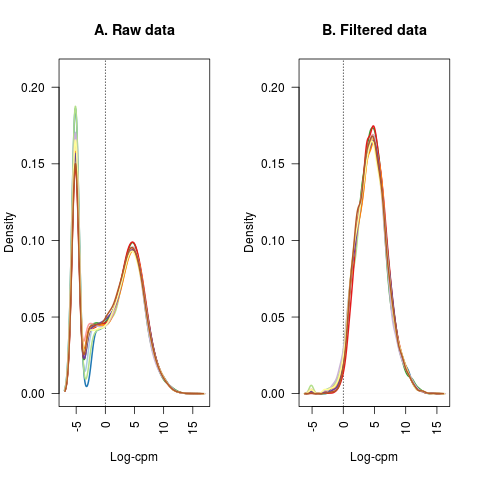

In [12]:
%%R
library(RColorBrewer)
nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")
par(mfrow=c(1,2))
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2,
 main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
den <- density(lcpm[,i])
lines(den$x, den$y, col=col[i], lwd=2)
}
#legend("topright", samplenames, text.col=col, bty="n")
lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2,
 main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(lcpm[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
#legend("topright", samplenames, text.col=col, bty="n")

In [13]:
%%R
x <- calcNormFactors(x, method = "TMM")
x$samples$norm.factors
#print(x)
#counts.data$samples$norm.factors

 [1] 1.1425845 1.1266490 1.1149156 1.1063358 1.1795451 1.2048503 1.1355253
 [8] 1.1363614 1.0936807 1.1075902 1.0735055 1.0802964 0.6958836 0.6855480
[15] 0.8066450 1.0240694 1.0732157 1.1443269 0.7770529 0.6762607 0.6710811
[22] 1.2019876 1.1162044 1.0676021


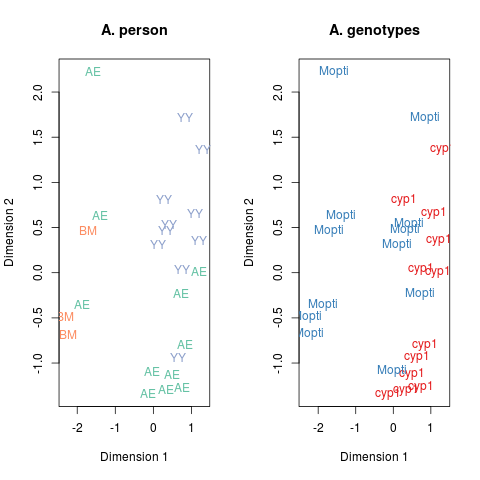

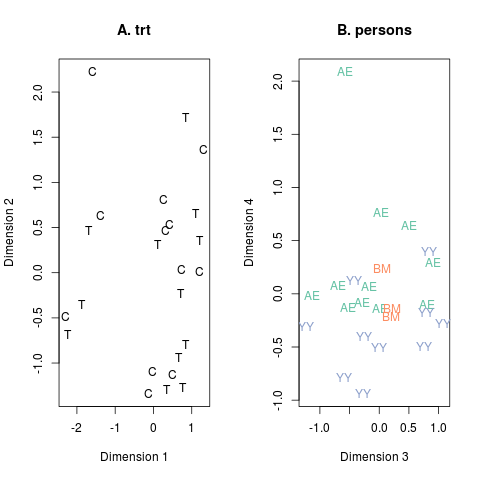

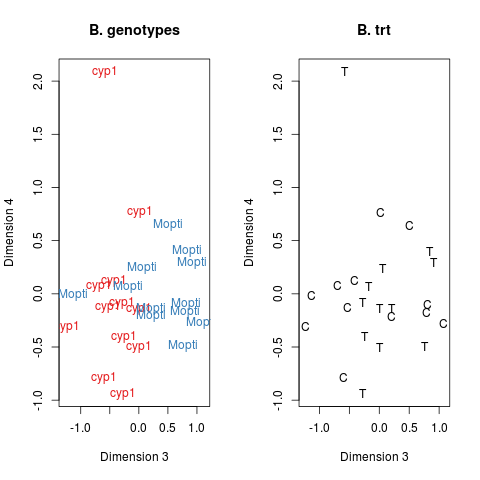

In [14]:
%%R
lcpm <- cpm(x, log=TRUE)
par(mfrow=c(1,2))

col.genotype <- genotype
levels(col.genotype) <- brewer.pal(nlevels(col.genotype), "Set1")
col.genotype <- as.character(col.genotype)

col.person <- person
levels(col.person) <- brewer.pal(nlevels(col.person), "Set2")
col.person <- as.character(col.person)

col.trt <- trt
levels(col.trt) <- brewer.pal(nlevels(col.trt), "Set3")
col.trt <- as.character(col.trt)

plotMDS(lcpm, labels=person, col=col.person)
title(main="A. person")
plotMDS(lcpm, labels=genotype, col=col.genotype)
title(main="A. genotypes")
plotMDS(lcpm, labels=trt)
title(main="A. trt")


plotMDS(lcpm, labels=person, col=col.person, dim=c(3,4))
title(main="B. persons")
plotMDS(lcpm, labels=genotype, col=col.genotype, dim=c(3,4))
title(main="B. genotypes")
plotMDS(lcpm, labels=trt, dim=c(3,4))
title(main="B. trt")

### Dim 1v2 is mostly experimentor-effect
### Dim 3v4 is mostly genotype-effect

In [15]:
%%R

group <- interaction(genotype,trt)

#Interaction effect. 2 factor ANOVA + person
design <- model.matrix(~0+group+person)  #group is a cell means model

colnames(design) <- gsub("group", "", colnames(design))
design



   cyp1.C Mopti.C cyp1.T Mopti.T personBM personYY
1       1       0      0       0        0        0
2       1       0      0       0        0        1
3       1       0      0       0        0        0
4       1       0      0       0        0        1
5       1       0      0       0        0        0
6       1       0      0       0        0        1
7       0       0      1       0        0        0
8       0       0      1       0        0        1
9       0       0      1       0        0        0
10      0       0      1       0        0        1
11      0       0      1       0        0        0
12      0       0      1       0        0        1
13      0       1      0       0        0        0
14      0       1      0       0        1        0
15      0       1      0       0        0        0
16      0       1      0       0        0        1
17      0       1      0       0        0        0
18      0       1      0       0        0        1
19      0       0      0       

In [16]:
%%R
contr.matrix <- makeContrasts(
 gt_control = cyp1.C - Mopti.C,
 gt_trt = cyp1.T - Mopti.T,
 trt_M = cyp1.T - cyp1.C,
 trt_C = Mopti.T - Mopti.C,
 gt_by_trt = (cyp1.T - Mopti.T) - (cyp1.C - Mopti.C),
    # GT = cyp1 - Mopti,
    #TRT = trtC-trtT,
 levels = colnames(design))
contr.matrix

          Contrasts
Levels     gt_control gt_trt trt_M trt_C gt_by_trt
  cyp1.C            1      0    -1     0        -1
  Mopti.C          -1      0     0    -1         1
  cyp1.T            0      1     1     0         1
  Mopti.T           0     -1     0     1        -1
  personBM          0      0     0     0         0
  personYY          0      0     0     0         0


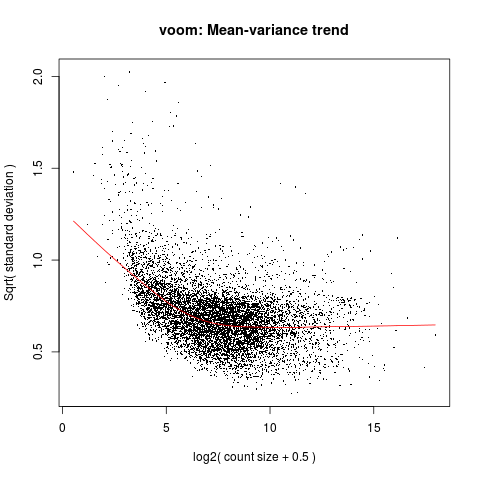

In [18]:
%%R
v <- voom(x, design, plot=TRUE)
#v

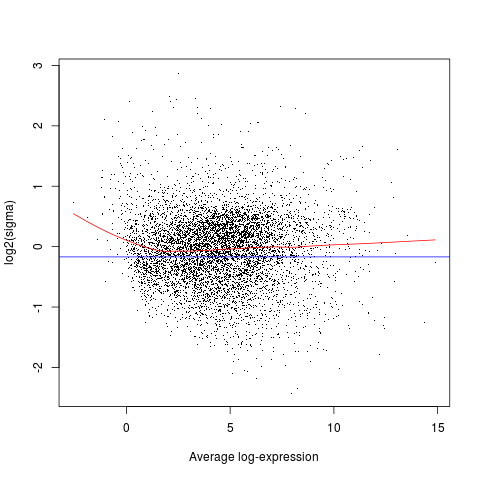

In [19]:
%%R
#apply voom precision weights to the data
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit)

In [20]:
%%R
summary(decideTests(efit))


   gt_control gt_trt trt_M trt_C gt_by_trt
-1         68     33     0     0         0
0        8359   8402  8485  8485      8485
1          58     50     0     0         0


In [21]:
%%R -o C_diff
contr.matrix <- makeContrasts(
 gt_control = cyp1.C - Mopti.C,
#  gt_trt = cyp1.T - Mopti.T,
#  trt_M = cyp1.T - cyp1.C,
#  trt_C = Mopti.T - Mopti.C,
#  gt_by_trt = (cyp1.T - Mopti.T) - (cyp1.C - Mopti.C),
    # GT = cyp1 - Mopti,
    #TRT = trtC-trtT,
 levels = colnames(design))
contr.matrix
vfit <- lmFit(v, design)

vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
print(summary(decideTests(efit)))

C_diff <- topTable(efit, n=Inf)

write.table(C_diff, file = "C_diff.tsv",sep="\t")



   gt_control
-1         68
0        8359
1          58


In [19]:
%%R -o T_diff
contr.matrix <- makeContrasts(
#  gt_control = cyp1.C - Mopti.C,
 gt_trt = cyp1.T - Mopti.T,
#  trt_M = cyp1.T - cyp1.C,
#  trt_C = Mopti.T - Mopti.C,
#  gt_by_trt = (cyp1.T - Mopti.T) - (cyp1.C - Mopti.C),
    # GT = cyp1 - Mopti,
    #TRT = trtC-trtT,
 levels = colnames(design))
contr.matrix
vfit <- lmFit(v, design)

vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
print(summary(decideTests(efit)))

T_diff <- topTable(efit, n=Inf)

write.table(T_diff, file = "T_diff.tsv",sep="\t")



   gt_trt
-1     33
0    8402
1      50


22 61 65
148


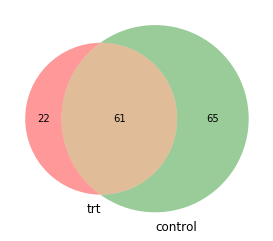

In [22]:
import pandas as pd
import matplotlib_venn as V
%matplotlib inline


#treatment DE genes
trt_diff = pd.read_csv("T_diff.csv")
trt_diff.columns = ['Acol_gene', 'logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B']

#filter by adjusted pval
trt_sig = trt_diff.loc[trt_diff['adj.P.Val'] <= 0.05]
trt_sig.to_csv('trt.csv', index=False)
#for line in open("trt.csv"):
#    print(line.strip())
trt_genes = set(trt_sig['Acol_gene'].tolist())

#control DE genes
control_diff = pd.read_csv("C_diff.csv")
control_diff.columns = ['Acol_gene', 'logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B']

#filter by adjusted pval
control_sig = control_diff.loc[control_diff['adj.P.Val'] <= 0.05]
control_sig.to_csv('control.csv', index=False)

control_genes = set(control_sig['Acol_gene'].tolist())

V.venn2([trt_genes,control_genes], ( "trt","control"))

trt_only = trt_genes - control_genes
control_only = control_genes - trt_genes
overlap = control_genes.intersection(trt_genes)

trt_df = trt_diff.loc[trt_diff['Acol_gene'].isin(trt_only)].drop_duplicates()
#print('trt_df', len(trt_df),trt_df)

C_df = control_diff.loc[trt_diff['Acol_gene'].isin(control_only)].drop_duplicates()
#print('C_df', len(C_df),C_df)

both_df = control_diff.loc[trt_diff['Acol_gene'].isin(overlap)].drop_duplicates()

trt = list(trt_only)
print(len(trt_df), len(both_df), len(C_df))
print(len(trt_df) + len(both_df) + len(C_df))

In [23]:
# How is CYP9K1 expressed?
import pandas as pd
import matplotlib_venn as V
%matplotlib inline
print("control")
print(control_diff.loc[control_diff['Acol_gene'] == 'ACOM036098'])
print("trt")
print(trt_diff.loc[trt_diff['Acol_gene'] == 'ACOM036098'])



control
      Acol_gene     logFC   AveExpr       t   P.Value  adj.P.Val         B
901  ACOM036098 -0.557394  9.536336 -2.2855  0.031991   0.326346 -4.199303
trt
       Acol_gene     logFC   AveExpr         t   P.Value  adj.P.Val        B
8240  ACOM036098 -0.039542  9.536336 -0.154013  0.878965   0.955543 -6.61137


In [24]:
#gene conversion key
import pandas as pd
info = pd.read_csv("entrez_genes.txt", delimiter='\t')
info.columns = ['Acol_gene', 'ID', 'Agap_gene', 'Agap_ID', 'name', 'descrip', 'genbank', 'entrez', 'RefSeq']
info = info[["Acol_gene","Agap_gene","name","descrip"]]

In [25]:
detected = pd.read_table("detected_genes.tsv")
detected['Acol_gene'] = detected.index

detected_agam = info.merge(detected, on='Acol_gene').drop_duplicates()
detected_agam.to_csv("detected_agam", sep='\t')



In [26]:
trt_merged = info.merge(trt_sig, on='Acol_gene').drop_duplicates()
control_merged = info.merge(control_sig, on='Acol_gene').drop_duplicates()

In [27]:
# Genes on Detox chip
detox = pd.read_table("/home/bradmain/git/Acol_cyp1_DESeq2/detox_chip/detox_chip_agap.txt2", header=None)
detox_agaps = set(detox[0])


AGAP006726
     Acol_gene   Agap_gene     name  \
12  ACOM023351  AGAP006726  COEAE5G   

                                              descrip    logFC   AveExpr  \
12  carboxylesterase [Source:VB Community Annotati...  1.67637  4.402045   

           t       P.Value  adj.P.Val         B  
12  7.068294  3.678967e-07   0.000642  6.709277  

AGAP003257
     Acol_gene   Agap_gene   name  \
45  ACOM035751  AGAP003257  GSTU2   

                                              descrip     logFC   AveExpr  \
45  glutathione S-transferase unclassified 2 [Sour... -1.385536  4.736792   

           t   P.Value  adj.P.Val         B  
45 -4.379362  0.000226   0.030905  0.476856  

AGAP008219
     Acol_gene   Agap_gene    name  \
83  ACOM030345  AGAP008219  CYP6Z1   

                                              descrip     logFC    AveExpr  \
83  cytochrome P450 [Source:VB Community Annotatio...  0.938892  10.734876   

           t  P.Value  adj.P.Val         B  
83  4.338435  0.00025   0.033132

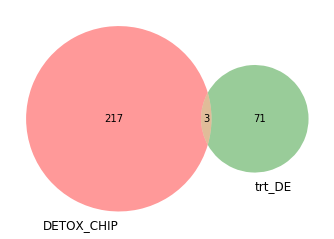

In [28]:
# How many trt DE genes are on the DETOX CHIP?
trt_agaps = set(trt_merged['Agap_gene'])

V.venn2([detox_agaps,trt_agaps], ( "DETOX_CHIP","trt_DE"))


for g in detox_agaps:
    if g in trt_agaps:
        print(g)
        print(trt_merged.loc[trt_merged['Agap_gene'] == g])
        print("")


AGAP011824
     Acol_gene   Agap_gene  name  \
91  ACOM032064  AGAP011824  TPX4   

                                              descrip     logFC   AveExpr  \
91  thioredoxin peroxidase 4 [Source:VB Community ... -2.054485  6.542117   

           t   P.Value  adj.P.Val         B  
91 -4.090112  0.000462   0.037326 -0.222727  

AGAP000088
     Acol_gene   Agap_gene     name  \
90  ACOM022664  AGAP000088  CYP4H19   

                                              descrip     logFC   AveExpr  \
90  cytochrome P450 [Source:VB Community Annotatio... -2.040968  0.814428   

           t   P.Value  adj.P.Val         B  
90 -5.018283  0.000047   0.007463  2.064255  

AGAP006726
    Acol_gene   Agap_gene     name  \
8  ACOM023351  AGAP006726  COEAE5G   

                                             descrip    logFC   AveExpr  \
8  carboxylesterase [Source:VB Community Annotati...  1.07135  4.402045   

          t   P.Value  adj.P.Val         B  
8  4.754043  0.000089   0.011522  1.405511  



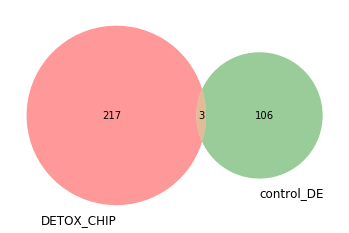

In [29]:
# How many control DE genes are on the DETOX CHIP?
control_agaps = set(control_merged['Agap_gene'])

V.venn2([detox_agaps,control_agaps], ( "DETOX_CHIP","control_DE"))

for g in detox_agaps:
    if g in control_agaps:
        print(g)
        print(control_merged.loc[control_merged['Agap_gene'] == g])
        print("")

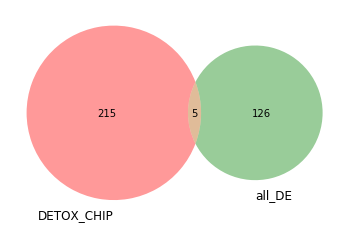

In [31]:
# How many of either control or trt DE genes are in known detox genes.
all_sig = pd.concat([trt_sig,control_sig], axis=0)
all_acol_DE = set(all_sig['Acol_gene'].drop_duplicates())
#for acol in all_acol_DE:
#    print(acol)
all_sig_agap = all_sig.merge(info, on='Acol_gene')

all_agap_DE = set(all_sig_agap['Agap_gene'])

V.venn2([detox_agaps,all_agap_DE], ( "DETOX_CHIP","all_DE"))



In [34]:
import pandas as pd

print("Total trt Acol genes:",len(trt_df))
trt_agap = trt_df.merge(info, on='Acol_gene').drop_duplicates()
trt_agap.to_csv('trt_specific.csv', index=False)


#print(trt_agap.columns.values)
trt_dict = trt_agap.set_index('Acol_gene')['Agap_gene'].to_dict()
print(" ".join(list(trt_dict.values())))
#By converting to a dictionary, I only take 1 ortholog (always the last one in the list, which is arbitrary). Basically,
# I do not want to overrepresent a given gene because it has multiple orthologs.
print("Acol genes with at least 1 agam ortholog:",len(trt_dict))
#print(len(trt_only))
#print(trt_only - set(list(trt_dict.keys())))


print("Total overlap Acol genes:",len(both_df))
overlap_agap = both_df.merge(info, on='Acol_gene').drop_duplicates()
overlap_agap.to_csv('overlap_specific.csv', index=False)
overlap_dict = overlap_agap.set_index('Acol_gene')['Agap_gene'].to_dict()
print("Acol overlap genes with at least 1 agam ortholog:",len(overlap_dict))

print('overlap',len(overlap), 'both_df', len(both_df), len(set(list(overlap_dict.keys()))), 'dict',len(overlap_dict))
print(overlap - set(list(overlap_dict.keys())))


print("Total control Acol genes:",len(C_df))
control_agap = C_df.merge(info, on='Acol_gene').drop_duplicates()
control_agap.to_csv('control_specific.csv', index=False)
print('control_merge', len(control_agap))

control_dict = control_agap.set_index('Acol_gene')['Agap_gene'].to_dict()
print("Acol genes with at least 1 agam ortholog:",len(control_dict))


# print(trt_dict)
# print(trt_dict.keys())
trt_val = list(trt_dict.values())
overlap_val = list(overlap_dict.values())
C_val = list(control_dict.values())
all_diff_agap = list(trt_val + overlap_val + C_val)

print(len(all_diff_agap))
print(len(set(all_diff_agap)))

trt_key = list(trt_dict.keys())
overlap_key = list(overlap_dict.keys())
C_key = list(control_dict.keys())
all_diff_acol_keys = list(trt_key + overlap_key + C_key)
print(len(all_diff_acol_keys))
print(len(set(all_diff_acol_keys)))
#Print all agap orthologs. In cases where multiple orthologs were ID'd, I picked one arbitrarily
#This is input for G:profiler
#print(" ".join(all_diff_agap))


Total trt Acol genes: 22
AGAP000152 AGAP013012 AGAP007384 AGAP008368 AGAP008539 AGAP002621 AGAP011218 AGAP007588 AGAP003846 AGAP028684 AGAP006197 AGAP010851 AGAP009649 AGAP003257 AGAP009120 AGAP006968 AGAP008627 AGAP008219 AGAP005024 AGAP004333 AGAP008545
Acol genes with at least 1 agam ortholog: 21
Total overlap Acol genes: 61
Acol overlap genes with at least 1 agam ortholog: 51
overlap 61 both_df 61 51 dict 51
{'ACOM026087', 'ACOM040015', 'ACOM040193', 'ACOM040085', 'ACOM042551', 'ACOM025590', 'ACOM042494', 'ACOM042495', 'ACOM040553', 'ACOM026131', 'ACOM034721', 'ACOM036463', 'ACOM035345', 'ACOM026807', 'ACOM029111', 'ACOM026136', 'ACOM033847', 'ACOM042671', 'ACOM034464', 'ACOM033232', 'ACOM035636', 'ACOM039630', 'ACOM031186', 'ACOM041581', 'ACOM024216', 'ACOM024051', 'ACOM036466', 'ACOM031056', 'ACOM040552'}
Total control Acol genes: 65
control_merge 67
Acol genes with at least 1 agam ortholog: 61
133
130
133
131


In [38]:
#Print Acol genes with no ortholog
all_acol = list(trt_sig['Acol_gene']) + list(control_sig['Acol_gene'])
print(len(set(all_acol)))
acol_with_ortho = list(trt_dict.keys()) + list(control_dict.keys()) + list(overlap_dict.keys())
print(len(set(acol_with_ortho)))
#209 - 133
print(len(set(all_acol) - set(acol_with_ortho)))

148
131
67


In [21]:
#treatment only up or down regulated
import pandas as pd
TRT_only_output = pd.read_csv("T_diff.tsv", delimiter='\t')
TRT_only_output["Acol_gene"] = TRT_only_output.index
TRT_only = TRT_only_output.loc[TRT_only_output['Acol_gene'].isin(trt_only)]
upreg_TRT = TRT_only.loc[TRT_only['logFC'] > 0]
print(len(upreg_TRT),upreg_TRT)
Dreg_TRT = TRT_only.loc[TRT_only['logFC'] < 0]
print(len(Dreg_TRT))


#overlap only up or down regulated
overlap_only = TRT_only_output.loc[TRT_only_output['Acol_gene'].isin(overlap)]
upreg_overlap = overlap_only.loc[overlap_only['logFC'] > 0]
print(len(upreg_overlap))
Dreg_overlap = overlap_only.loc[overlap_only['logFC'] < 0]
print(len(Dreg_overlap))

16                logFC    AveExpr         t   P.Value  adj.P.Val         B  \
ACOM034791  4.672494  -1.393806  6.156941  0.000003   0.001337  3.711582   
ACOM032666  2.198588   2.325472  5.434096  0.000017   0.005305  3.066228   
ACOM042528  2.655139   0.764465  5.177008  0.000032   0.008971  2.351854   
ACOM025627  0.704270   5.342870  4.800154  0.000080   0.015740  1.471739   
ACOM031472  1.527545   4.301103  4.549927  0.000148   0.023701  0.916701   
ACOM025860  0.892671   5.894946  4.557557  0.000145   0.023701  0.884367   
ACOM029828  1.640727   2.968003  4.447449  0.000191   0.027438  0.751355   
ACOM027256  1.110180   4.525357  4.488539  0.000172   0.026084  0.747720   
ACOM040123  4.381001  -1.890198  4.534252  0.000154   0.024158  0.692905   
ACOM038152  1.513904   1.299614  4.388394  0.000221   0.030905  0.686583   
ACOM041597  1.586338   4.147106  4.380991  0.000225   0.030905  0.516970   
ACOM024523  2.255893   2.486001  4.281555  0.000288   0.036746  0.402656   
ACOM03034

In [20]:
#control only up or down regulated
import pandas as pd
control_only_output = pd.read_csv("C_diff.tsv", delimiter='\t')
control_only_output["Acol_gene"] = control_only_output.index
#print(control_only["Acol_gene"])
CONTROL_only = control_only_output.loc[control_only_output['Acol_gene'].isin(control_only)]
upreg_control = CONTROL_only.loc[CONTROL_only['logFC'] > 0]
print(len(upreg_control))
Dreg_control = CONTROL_only.loc[CONTROL_only['logFC'] < 0]
print(len(Dreg_control))

24
41


                                                0    1           2
46                            centrosomal protein   2R  AGAP003449
72                           niemann-pick type c-   2R  AGAP001956
79    multiple inositol polyphosphate phosphatase   2L  AGAP006962
219                                       amidase   2R  AGAP002377
259                                   ce5 protein   3R  AGAP008004
358                                      ---NA---   2L  AGAP006501
371   AGAP005787-PA [Anopheles gambiae str. PEST]   2L  AGAP005787
1099                                      unknown   2L  AGAP006501
1342  multiple inositol polyphosphate phosphatase  NaN  AGAP006962
1434                           cg14949 cg14949-pa   2L  AGAP006602
1485                anion exchange protein slc4a2   2L  AGAP006115
1500                                   ninjurin a   2L  AGAP006745
1523                anion exchange protein slc4a2   2L  AGAP006115
1540                                   ninjurin a   2L  AGAP00

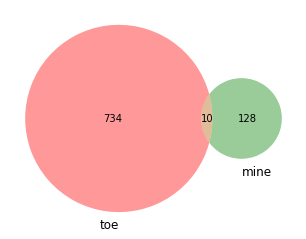

In [21]:
import pandas as pd
import matplotlib_venn as V
%matplotlib inline

#Toé, Kobié H., Sagnon N’Falé, Roch K. Dabiré, Hilary Ranson, and Christopher M. Jones. 2015. “The Recent Escalation in Strength of Pyrethroid Resistance in Anopheles Coluzzi in West Africa Is Linked to Increased Expression of Multiple Gene Families.” BMC Genomics 16 (March). bmcgenomics.biomedcentral.com: 146.
toe = set(pd.read_table("toe_candidates_193.tsv",header=None)[0].str.split('-').str.get(0).tolist())
all_toe = set(pd.read_table("toe_candidates.tsv",header=None)[0].str.split('-').str.get(0).tolist())

#V.venn2([toe,all_agaps], ( "toe","mine"))
V.venn2([all_toe,all_agaps], ( "toe","mine"))

toe_intersect = list(all_toe.intersection(all_agaps))

toe_names = pd.read_table("toe_candidates_names.tsv",header=None).drop_duplicates()
#toe_names = pd.read_table("toe_candidates_names.tsv",header=None)
toe_names[2] = toe_names[2].str.split('-').str.get(0)
#print(toe_names.loc[toe_names[2].isin(toe_intersect)][2].drop_duplicates())
print(toe_names.loc[toe_names[2].isin(toe_intersect)])

['AGAP007588']


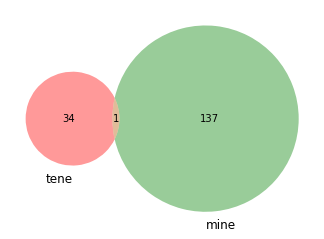

In [22]:

import pandas as pd
import matplotlib_venn as V
%matplotlib inline

#Fossog Tene, Billy, Rodolphe Poupardin, Carlo Costantini, Parfait Awono-Ambene, Charles S. Wondji, Hilary Ranson, and Christophe Antonio-Nkondjio. 2013. “Resistance to DDT in an Urban Setting: Common Mechanisms Implicated in Both M and S Forms of Anopheles Gambiae in the City of Yaoundé Cameroon.” PloS One 8 (4): e61408.tene = set(pd.read_table("tene.tsv",header=None)[0].str.split('-').str.get(0).tolist())
all_tene = set(pd.read_table("tene.tsv",header=None)[0].str.split('-').str.get(0).tolist())

#print(all_tene)
V.venn2([all_tene,all_agaps], ( "tene","mine"))

tene_intersect = list(all_tene.intersection(all_agaps))
print(tene_intersect)
# toe_names = pd.read_table("toe_candidates_names.tsv",header=None).drop_duplicates()
# #toe_names = pd.read_table("toe_candidates_names.tsv",header=None)
# toe_names[2] = toe_names[2].str.split('-').str.get(0)
# #print(toe_names.loc[toe_names[2].isin(toe_intersect)][2].drop_duplicates())
# print(toe_names.loc[toe_names[2].isin(toe_intersect)])

In [31]:
%%R
source("http://bioconductor.org/biocLite.R")

biocLite("biomaRt")
library(biomaRt)
listMarts(host = "biomart.vectorbase.org")

vectorbase_gene <- useMart("vb_gene_mart_1610", host = "biomart.vectorbase.org")
listDatasets(vectorbase_gene)

#listmart("vb_gene_mart_1610")
%%R
acolGenes<-useMart(biomart = "vb_gene_mart_1610", dataset = "acoluzzii_eg_gene", host = "biomart.vectorbase.org")

#acolGenes<-useDataset("acoluzzii_eg_gene", vectorbase_gene)
#acolGenes
#listFilters(acolGenes)
listAttributes(acolGenes)
#listDatasets(vectorbase_gene)

%%R -i trt
# get biomart annotation
attributes <- c("name", "chromosome_name",
                "start_position","end_position", "agambiae_eg_gene", 
                "agambiae_eg_chromosome","agambiae_eg_chrom_start","agambiae_eg_chrom_end",
                "go_accession", "description")
#attributes
#attributes <- c("affy_mogene_1_0_st_v1", "chromosome_name",
#                "start_position","end_position", "ensembl_gene_id", 
 #               "external_gene_id", "description")
genes <- getBM(attributes=attributes, filters="name", 
               values=trt, mart=acolGenes, uniqueRows=T)

            biomart               version
1 vb_gene_mart_1610      VectorBase Genes
2  vb_snp_mart_1610  VectorBase Variation
3        expression VectorBase Expression


In [19]:
Develop diagnostic SNP
radio label permethrin

SyntaxError: invalid syntax (<ipython-input-19-db6291bdeec9>, line 1)

In [21]:
inversions=["2Rc","2Rb","2La"]
## plot inversions
inv={}
for line in open("/mnt/lanzarobas/home/bradmain/gambiae/gene_flow/pest_M/An_gambiae_karyotype.gtf"):
    i=line.strip().split()
    chr=i[0]
    l=int(i[3])
    r=int(i[4])
    name=i[9].strip(";").strip('"')
    if name not in inversions:
        continue
    num=int(i[-1].strip(";").strip('"'))
    if chr not in inv:
        inv[chr]={}
    if name not in inv[chr]:
        inv[chr][name]={}
    inv[chr][name][num]=[l/1.0e6,r/1.0e6]
outer=[inv["2R"]["2Rb"][1][0],inv["2R"]["2Rb"][2][1]]
inner=[inv["2R"]["2Rb"][1][1],inv["2R"]["2Rb"][2][0]]
Couter=[inv["2R"]["2Rc"][1][0],inv["2R"]["2Rc"][2][1]]
Cinner=[inv["2R"]["2Rc"][1][1],inv["2R"]["2Rc"][2][0]]
outer2La=[inv["2L"]["2La"][1][0],inv["2L"]["2La"][2][1]]
inner2La=[inv["2L"]["2La"][1][1],inv["2L"]["2La"][2][0]]

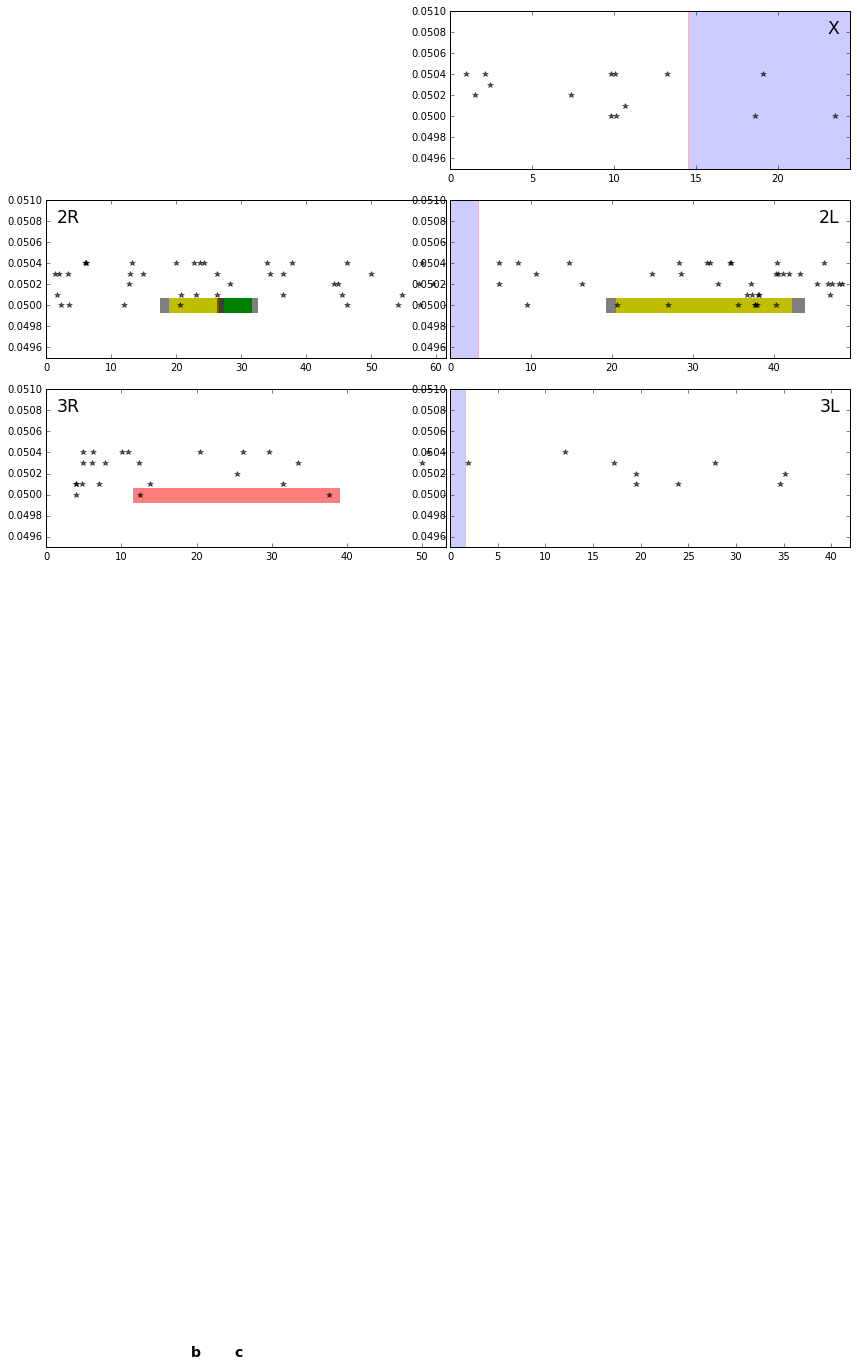

In [24]:
#!/usr/bin/python
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as P
import numpy
import random


fig, axes = P.subplots(ncols=2,nrows=3)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=.01, hspace=None)
((N,chrX), (chr2R, chr2L), (chr3R, chr3L)) = axes
N.axis('off')

#chrX = P.subplot2grid((3,3), (2,1), colspan=1)
# chr2L.subplot2grid((3,3), (2,0), colspan=1)
# chr2R.subplot2grid((3,3), (2,1), colspan=1)
chr2L.set_xlim([0, 49.364325])
chr2R.set_xlim([0, 61.545105])
# chr3L = P.subplot2grid((3,3), (2,0), colspan=1)
# chr3R = P.subplot2grid((3,3), (2,1), colspan=1)
chr3L.set_xlim([0, 41.963435])
chr3R.set_xlim([0, 53.200684])
chrX.set_xlim([0, 24.393108])

chrX.set_ylim([0.0495, 0.051])
chr2L.set_ylim([0.0495, 0.051])
chr2R.set_ylim([0.0495, 0.051])
chr3L.set_ylim([0.0495, 0.051])
chr3R.set_ylim([0.0495, 0.051])

INV_HEIGHT = 0.05
# chr2L.plot(outer2La,[INV_HEIGHT,INV_HEIGHT],'k-',linewidth=5,alpha=0.5)
# chr2L.plot(inner2La,[INV_HEIGHT,INV_HEIGHT],'y-',linewidth=5)
chr2R.plot(outer,[INV_HEIGHT,INV_HEIGHT],'k-',linewidth=15,alpha=0.5)
chr2R.plot(inner,[INV_HEIGHT,INV_HEIGHT],'y-',linewidth=15,label='2Rb inversion')
#chrX.plot(inner,[INV_HEIGHT+1000,INV_HEIGHT+1000],'y-',linewidth=15,label='2Rb inversion') #just plotting out of range on X for legend purposes
chr2R.text(numpy.mean(inner)-.5,INV_HEIGHT-0.01,'b',fontweight='bold',fontsize=14)
chr2R.plot(Couter,[INV_HEIGHT,INV_HEIGHT],'k-',linewidth=15,alpha=0.5)
chr2R.plot(Cinner,[INV_HEIGHT,INV_HEIGHT],'g-',linewidth=15,label='2Rc inversion')
#chrX.plot(Cinner,[INV_HEIGHT+1000,INV_HEIGHT+1000],'g-',linewidth=15,label='2Rc inversion') #just plotting out of range on X for legend purposes
chr2R.text(numpy.mean(Cinner)-.5,INV_HEIGHT-0.01,'c',fontweight='bold',fontsize=14)
chr2L.plot(outer2La,[INV_HEIGHT,INV_HEIGHT],'k-',linewidth=15,alpha=0.5)
chr2L.plot(inner2La,[INV_HEIGHT,INV_HEIGHT],'y-',linewidth=15)
chr3R.plot([12.5,38],[INV_HEIGHT,INV_HEIGHT],'r-',linewidth=15,alpha=0.5,label='3Ra inversion')
# chrX.plot([12.5+1000,38+1000],[INV_HEIGHT,INV_HEIGHT],'r-',linewidth=15,alpha=0.5,label='3Ra inversion') #just plotting out of range on X for legend purposes
#chr3R.text(numpy.mean([12.5,38]),INV_HEIGHT-0.01,'a',fontsize=14,fontweight='bold')
#chrX.plot([14.5,24.393108],[0.05, 0.05],'g-',linewidth=50,label='2Rc inversion') #just plotting out of range on X for legend purposes

#islands of speciation
chrX.fill([14.5,14.5,24.393108,24.393108], [.0495,.051,.051,.0495], 'b', alpha=0.2, edgecolor='r')
chr2L.fill([0,0,3.5,3.5], [.0495,.051,.051,.0495], 'b', alpha=0.2, edgecolor='r')
chr3L.fill([0,0,1.6,1.6], [.0495,.051,.051,.0495], 'b', alpha=0.2, edgecolor='r')

# chromosome names
for C in ['X', '2R', '2L', '3R', '3L']:

    ax = globals()['chr'+C]
    if( C[-1] == 'L' or C[-1] == "X"):
        x = 0.975
        ha = 'right'
    else:
        x = 0.025
        ha = 'left'
        #ax.text(x, 0.95, r'\textbf{'+C+'}', size='xx-large', ha=ha, va='top', transform=ax.transAxes)
    ax.text(x, 0.95, C, size='xx-large', ha=ha, va='top', transform=ax.transAxes)

    
gtf = pd.read_csv("Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.4.genes", delimiter='\t', header=None)
gtf[9] = gtf[8].str.extract('([A-Z]\w{0,})').astype(str)   #Gene ID
gtf[10] = (gtf[3]+gtf[4])/2 # middle of gene

#trt_locations = gtf.loc[gtf[9].isin(agaps)][[9,0,10,6]]
DE_locations = gtf.loc[gtf[9].isin(all_diff_agap)][[9,0,10,6]]

# print(trt_locations)
chroms = ['2L','2R','3R','3L','X']
for CHROM in chroms:
    #short = trt_locations.loc[trt_locations[0]==CHROM][10].tolist()
    short = DE_locations.loc[DE_locations[0]==CHROM][10].tolist()
    for pos in short:
        #y_pos = random.randrange(.049,.051,.0005)
        #y_pos = random.randrange(490,510,5) / 10000
        y_pos = random.randrange(500,505,1) / 10000
        p = pos/1000000
        if CHROM=='2L':
            chr2L.plot(p,y_pos,'k*',alpha=.7)
        if CHROM=='2R':
            chr2R.plot(p,y_pos,'k*',alpha=.7)
        if CHROM=='3L':
            chr3L.plot(p,y_pos,'k*',alpha=.7)
        if CHROM=='3R':
            chr3R.plot(p,y_pos,'k*',alpha=.7)
        if CHROM=='X':
            chrX.plot(p,y_pos,'k*',alpha=.7)

fig.set_size_inches(14.4, 9.6)

P.show()


In [29]:
%%R
contr.matrix <- makeContrasts(
#  gt_control = cyp1.C - Mopti.C,
#  gt_trt = cyp1.T - Mopti.T,
  trt_M = cyp1.T - cyp1.C,
#  trt_C = Mopti.T - Mopti.C,
#  gt_by_trt = (cyp1.T - Mopti.T) - (cyp1.C - Mopti.C),
    # GT = cyp1 - Mopti,
    #TRT = trtC-trtT,
 levels = colnames(design))
contr.matrix
vfit <- lmFit(v, design)

vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
print(summary(decideTests(efit)))

T_effect <- topTable(efit, n=Inf)



   trt_M
-1     0
0   9456
1      0


In [ ]:
%%R
contr.matrix <- makeContrasts(
#  gt_control = cyp1.C - Mopti.C,
  gt_trt = cyp1.T - Mopti.T,
#  trt_M = cyp1.T - cyp1.C,
#  trt_C = Mopti.T - Mopti.C,
#  gt_by_trt = (cyp1.T - Mopti.T) - (cyp1.C - Mopti.C),
    # GT = cyp1 - Mopti,
    #TRT = trtC-trtT,
 levels = colnames(design))
contr.matrix
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
lvtt <- topTable(efit)
head(lvtt)

In [28]:
%%R
lvtt <- topTable(efit)
print(lvtt)

           gt_control    gt_trt       trt_M      trt_C   gt_by_trt    AveExpr
ACOM025711   4.134414  5.463765 -0.44952576 -1.7788769  1.32935116  2.6392136
ACOM024333   4.167499  4.391412  0.06009423 -0.1638187  0.22391298 -1.8125472
ACOM036733  -4.811277 -4.860292 -1.22692788 -1.1779131 -0.04901474  1.7188216
ACOM024216  -3.444530 -2.218703  0.21869462 -1.0071325  1.22582708  7.6304611
ACOM031738  -2.346689 -1.803847  0.19200151 -0.3508400  0.54284146  1.5968077
ACOM042495   1.267916  1.143403  0.10267928  0.2271923 -0.12451302  5.2712836
ACOM024520   1.128254  1.078359  0.08568198  0.1355777 -0.04989570  6.4451291
ACOM042278  -2.485423 -2.659888 -0.33082441 -0.1563589 -0.17446552  2.3601959
ACOM042494   1.334442  1.291146  0.08372221  0.1270188 -0.04329655  3.3005993
ACOM039599   4.112554  3.909542 -0.37884319 -0.1758313 -0.20301194  0.1855518
                  F      P.Value    adj.P.Val
ACOM025711 57.67925 7.622177e-11 7.207530e-07
ACOM024333 43.78681 1.165540e-09 5.510675e-06
ACOM

In [18]:
# %%R -o dt
# tfit <- treat(vfit, lfc=1)
# dt <- decideTests(tfit)
# summary(dt)
#print(dt)

     GT
-1   12
0  9432
1    12


In [36]:
%%R -o gt_diff

gt_diff <- topTags(tfit)
# topTreat(tfit, coef=1, n=Inf)
# #write.csv(gt_diff, file = 'GTresults.txt')
# write.fit(tfit, dt, file="GTresults.txt")
head(gt_diff)


Error in topTags(tfit) : Need to run exactTest or glmLRT first


/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in topTags(tfit) : Need to run exactTest or glmLRT first

  warnings.warn(x, RRuntimeWarning)


In [26]:
print(len(gt_diff))

9456


In [28]:
%%R
#library("limma")
plotMD(tfit, column=1, status=dt[,1], main=colnames(tfit)[1],xlim=c(-8,13))


Error in withVisible({ : could not find function "plotMD"


In [ ]:
# for genotyping kdr
for fq in /home/bradmain/gambiae/malphigs/raw/*-*fastq.gz
do
echo "bwa mem -t8/home/bradmain/gambiae/ASE/bin/STAR/source/STAR --genomeDir /home/bradmain/gambiae/malphigs/raw/STAR/Acolgenome --sjdbGTFfile /home/bradmain/gambiae/malphigs/raw/STAR/Acolgenome/Anopheles-coluzzii-Mali-NIH_BASEFEATURES_AcolM1.3.gtf --readFilesIn $fq --readFilesCommand zcat --outSAMtype BAM Unsorted SortedByCoordinate --outFilterMultimapNmax 1 --outSAMunmapped Within --quantMode TranscriptomeSAM GeneCounts --twopassMode Basic --outFileNamePrefix $(basename $fq _L007_R1_001.fastq.gz) --runThreadN 20"
done
#parallel
